In [1]:
import pandas as pd
import numpy 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

df = pd.read_csv("hours.csv")
df.head()

,Hours,Risk
0,10,95
1,9,80
2,2,10
3,15,50
4,10,45


In [2]:
x = df.iloc[:,:-1].values
y = df.iloc[:,1].values

In [3]:
regressor = LinearRegression()
regressor.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
hours = int(input('Enter the no of hours :'))

Enter the no of hours :13


In [6]:
eq=regressor.coef_*hours+regressor.intercept_
print(eq)

[72.22730989]


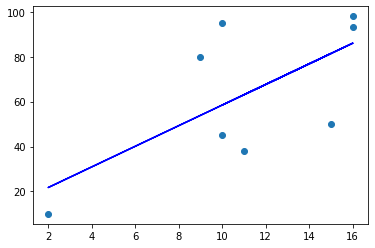

In [7]:
plt.plot(x,y,'o')
plt.plot(x,regressor.predict(x),'b')
plt.show()

In [8]:
sc=cross_val_score(regressor,x,y,cv=3,scoring='r2')
sc.mean()

-0.24876326251046066

In [9]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Ridge,LassoCV,Lasso,ElasticNet,LinearRegression

X=load_diabetes().data
y=load_diabetes().target

In [10]:
lr=LinearRegression(normalize=True)
lr_score=cross_val_score(lr,X,y,cv=10)
lr_score.mean()

0.4619623619583372

In [11]:
al=[0.5,0.1,1,2,5,10,0.05,0.005]
for i in range (len(al)):
    ridge=Ridge(alpha=al[i])
    lr_score=cross_val_score(ridge,X,y,cv=10)
    print(al[i],lr_score.mean())

0.5 0.44180819270734994
0.1 0.4633240541517594
1 0.405416661023685
2 0.34350148556276927
5 0.23008202832162788
10 0.14073336829771602
0.05 0.4634759226552429
0.005 0.4627700686035231


In [12]:
ridge= Ridge(alpha=0.05)
ridge_score=cross_val_score(ridge,X,y,cv=10,)
ridge_score.mean()

0.4634759226552429

In [13]:
lassocv=LassoCV(alphas=(1,0.1,0.5,0.05,0.0025,0.0001),normalize=True)
lassocv.fit(X,y)

C:\Users\ramyajoshi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LassoCV(alphas=(1, 0.1, 0.5, 0.05, 0.0025, 0.0001), copy_X=True, cv='warn',
        eps=0.001, fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=None,
        normalize=True, positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [14]:
lasso= Lasso(alpha=0.005)
lasso_score=cross_val_score(lasso,X,y,cv=10)
lasso_score.mean()

0.4627884114788897

In [15]:
en=ElasticNet(alpha=0.001,l1_ratio=0.8,normalize=True)
en_score=cross_val_score(en,X,y,cv=10)
en_score.mean()


0.46358858847836454

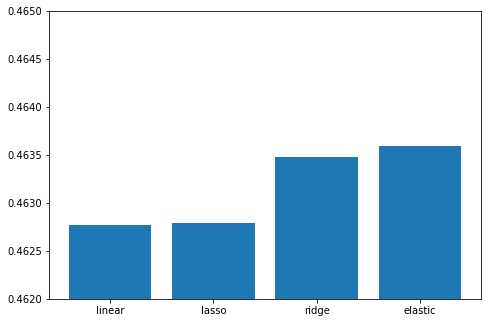

In [16]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
reg = ['linear', 'lasso', 'ridge', 'elastic']
score = [lr_score.mean(),lasso_score.mean(),ridge_score.mean(),en_score.mean()]
ax.bar(reg,score)
plt.ylim(0.462,0.465)
plt.show()